### Решить дифференциальное уравнение численно и аналитически:

$−u''(x) + u(x) = x, \; 0 ≤ x ≤ 1 $

$u(0) = u(1) = 0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import time

1. Аналитическое решение:

$u(x) = \dfrac{e^{1 - x} - e^{1 + x} - x + e^2 x}{e^2 - 1}$

In [2]:
def analytical_solve(N):
    h = 1 / (N + 1)
    x = np.linspace(h, 1, num=N, endpoint=False)
    ans = (np.exp(1 - x) - np.exp(1 + x) + x * (np.e ** 2 - 1)) / (np.e ** 2 - 1)

    return ans

2. Численное решение путем решения СЛАУ для квадратной матрицы А

In [3]:
def direct_num_solve(N):
    h = 1 / (N + 1)
    b = np.linspace(h, 1, num=N, endpoint=False)
    
    A = np.zeros((N, N))
    diag, subd1, subd2 = range(N), range(N - 1), range(1, N)
    A[subd1, subd2], A[subd2, subd1] = -h ** (-2), -h ** (-2)
    A[diag, diag] = 2 / h ** 2 + 1
    
    ans = np.linalg.solve(A, b)
    
    return ans

In [47]:
err = []
times = []
n_range = range(50, 2001, 50)

for n in n_range:
    ans1 = analytical_solve(n)
    
    t1 = time.time()
    ans2 = direct_num_solve(n)
    t2 = time.time() - t1
    
    err.append(np.linalg.norm(ans2 - ans1))
    times.append(t2)

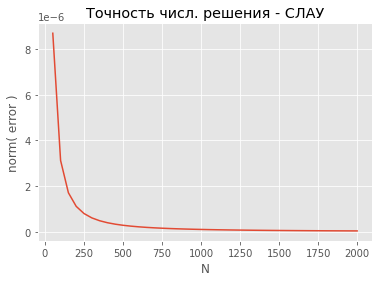

In [48]:
plt.plot(n_range, err)
plt.title('Точность числ. решения - СЛАУ')
plt.xlabel('N')
plt.ylabel('norm( error )')
plt.show()

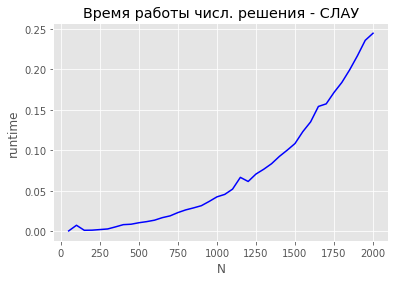

In [49]:
plt.plot(n_range, times, color='blue')
plt.title('Время работы числ. решения - СЛАУ')
plt.xlabel('N')
plt.ylabel('runtime')
plt.show()

3. Численное решение методом прогонки

In [13]:
def diag_num_solve(N):
    h = 1 / (N + 1)
    s = np.linspace(h, 1, num=N, endpoint=False)
    a = b = -h ** (-2)
    c = 2 / h ** 2 + 1
    
    alpha, betta = np.empty(N - 1), np.empty(N - 1)
    alpha[0] = -b / c
    betta[0] = s[0] / c
    
    for i in range(1, N - 1):
        denom = c + a * alpha[i - 1]
        alpha[i] = -b / denom
        betta[i] = (s[i] - betta[i - 1] * a) / denom
    
    ans = np.empty(N)    
    ans[N - 1] = (s[N - 1] - betta[N - 2] * a) / (c + alpha[N - 2] * a)
    
    for i in range(N - 2, -1, -1):
        ans[i] = betta[i] + alpha[i] * ans[i + 1]
        
    return ans

In [43]:
err2 = []
times2 = []
n_range = range(50, 2001, 50)

for n in n_range:
    ans1 = analytical_solve(n)
    
    t1 = time.time()
    ans2 = diag_num_solve(n)
    t2 = time.time() - t1
    
    err2.append(np.linalg.norm(ans2 - ans1))
    times2.append(t2)

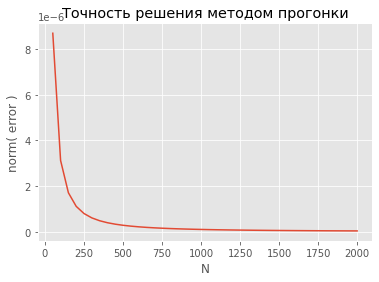

In [44]:
plt.plot(n_range, err2)
plt.title('Точность решения методом прогонки')
plt.xlabel('N')
plt.ylabel('norm( error )')
plt.show()

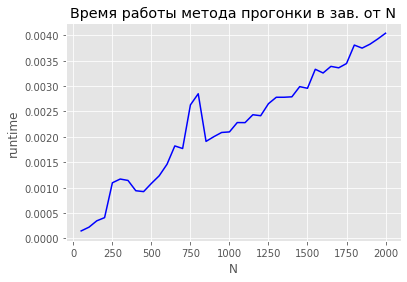

In [45]:
plt.plot(n_range, times2, color='blue')
plt.title('Время работы метода прогонки в зав. от N')
plt.xlabel('N')
plt.ylabel('runtime')
plt.show()

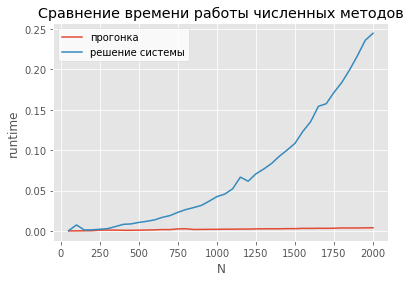

In [50]:
plt.plot(n_range, times2, label='прогонка')
plt.plot(n_range, times, label='решение системы')
plt.title('Сравнение времени работы численных методов')
plt.legend(facecolor='white')
plt.xlabel('N')
plt.ylabel('runtime')
plt.show()

Метод прогонки позволил найти численное решение дифференциального уравнения за линейное от $N$ время, вместо полиномиального. При этом оба решения показывают точность одинакового порядка